In [146]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [147]:
data=pd.read_csv('/content/house_price_prediction.csv')

In [148]:
data.shape

(17210, 18)

In [149]:
data.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.721000e+04,17210.000000,17210.000000,1.721000e+04,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000
mean,5.391069e+05,3.373213,2080.172051,1.513545e+04,1.498605,0.008077,3.409587,7.661941,1788.108077,292.063974,1971.285880,84.305985,98077.903661,47.559731,-122.213991,1987.480244,12785.612028
std,3.674218e+05,0.927616,917.995097,4.260361e+04,0.542192,0.089509,0.646909,1.170044,824.994890,443.397892,29.378191,401.454725,53.554500,0.138973,0.140486,684.866281,27294.470122
min,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.200000e+05,3.000000,1420.000000,5.034000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.468925,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.400000e+05,4.000000,2550.000000,1.070075e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678175,-122.125000,2368.250000,10092.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [150]:
data.drop('yr_renovated',axis=1)

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,4/16/2015,479000,2,1730,1037,3.5,0,3,8,1730,0,2008,98118,47.5594,-122.285,1280,1026
1,04-02-2015,525000,3,1730,1074,3.5,0,3,8,1730,0,2006,98107,47.6692,-122.392,1370,1185
2,08-01-2014,435000,3,1440,1350,3.5,0,3,8,1440,0,2005,98103,47.6525,-122.345,1440,1350
3,6/25/2014,563500,3,1400,1312,3.5,0,3,8,1400,0,2007,98103,47.6534,-122.355,1350,1312
4,9/18/2014,525000,2,1310,1268,3.5,0,3,8,1310,0,2007,98103,47.6534,-122.355,1350,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17205,2/23/2015,425000,3,1360,542322,1.0,0,4,7,1140,220,1955,98022,47.2069,-122.024,1700,60548
17206,3/27/2015,700000,3,2530,623779,1.0,0,4,8,2530,0,1980,98038,47.4188,-121.949,2120,100623
17207,7/30/2014,790000,2,2560,982278,1.0,0,3,8,2560,0,2004,98014,47.6955,-121.861,1620,40946
17208,05-04-2015,190000,2,710,1164794,1.0,0,2,5,710,0,1915,98014,47.6888,-121.909,1680,16730


In [151]:
data.nunique()

date              366
price            3206
bedrooms           12
sqft_living       950
sqft_lot         8514
floors              6
waterfront          2
condition           5
grade              11
sqft_above        859
sqft_basement     293
yr_built          116
yr_renovated       70
zipcode            70
lat              4848
long              721
sqft_living15     718
sqft_lot15       7592
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

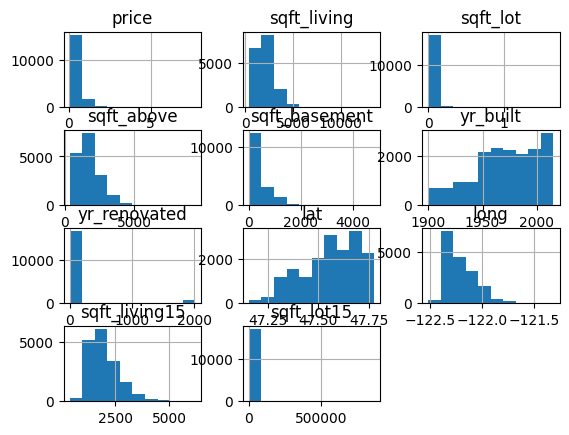

In [152]:
data.loc[:,(data.nunique()>15) & (data.columns != 'zipcode')].hist() #plotting hist of colm which are continuoues
#to check normal dist--- shd be less outliers (box plot ) apply skewness and kurtosis for deeper o/p

<Axes: >

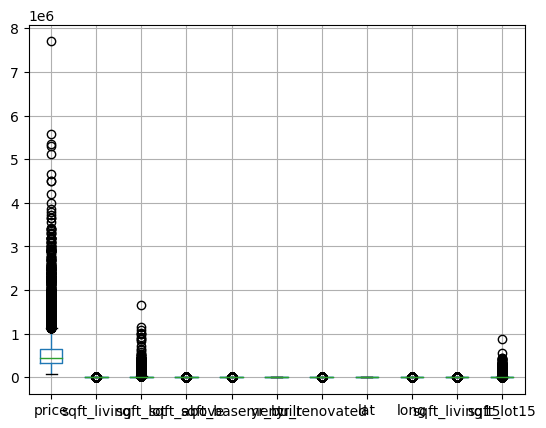

In [153]:
data.loc[:,(data.nunique()>15) & (data.columns != 'zipcode')].boxplot()

columns =  price


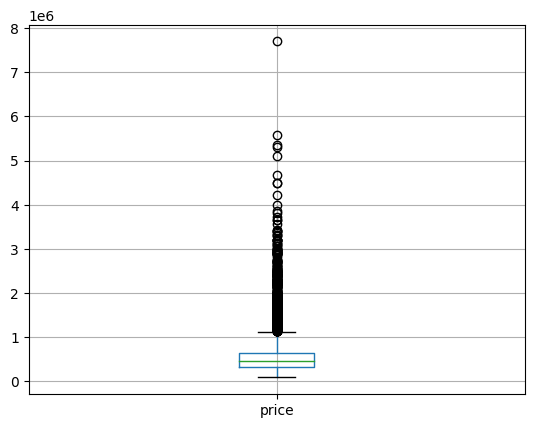

columns =  sqft_living


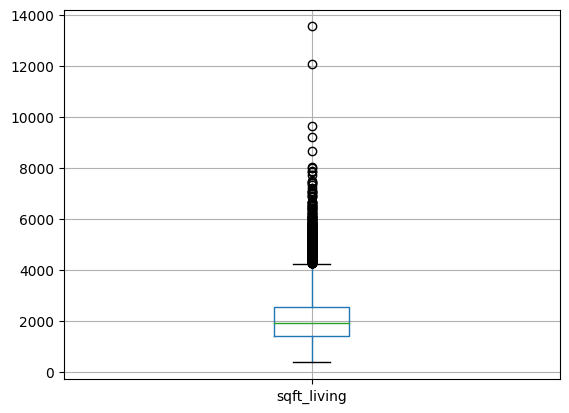

columns =  sqft_lot


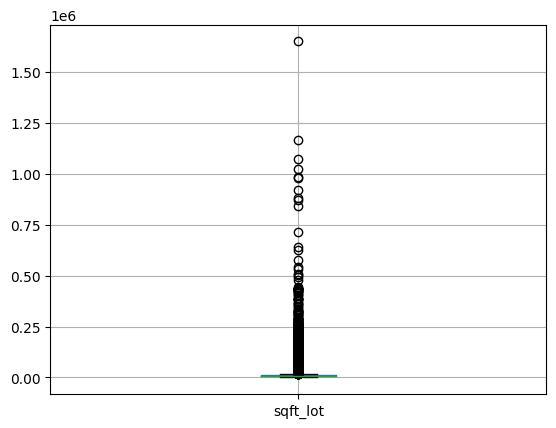

columns =  sqft_above


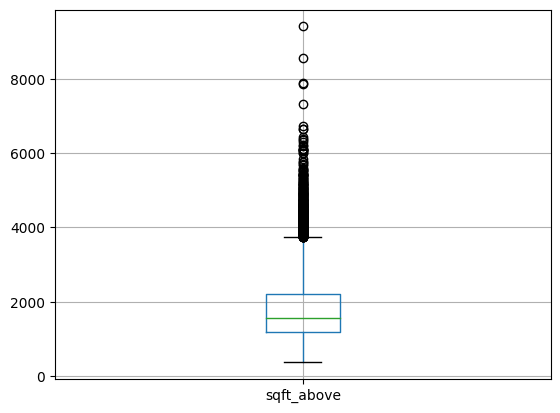

columns =  sqft_basement


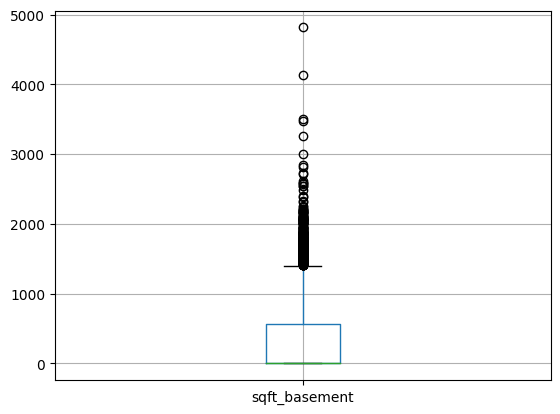

columns =  yr_built


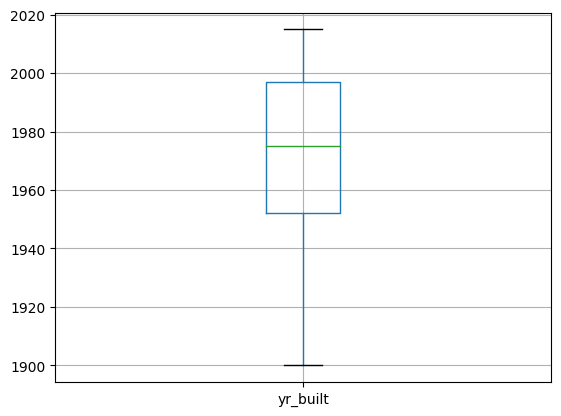

columns =  yr_renovated


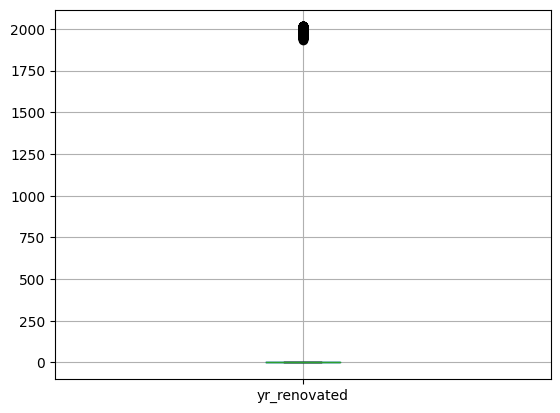

columns =  lat


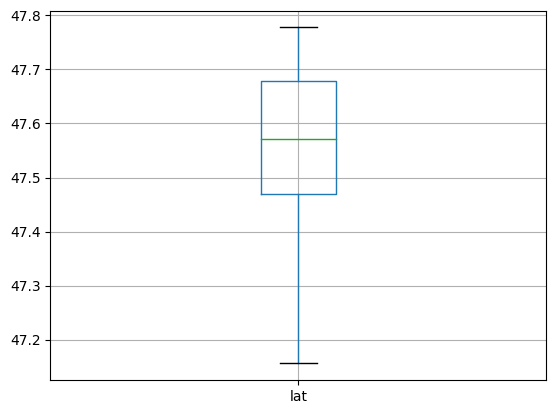

columns =  long


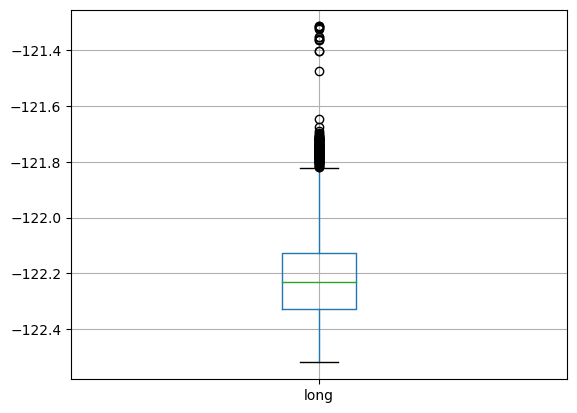

columns =  sqft_living15


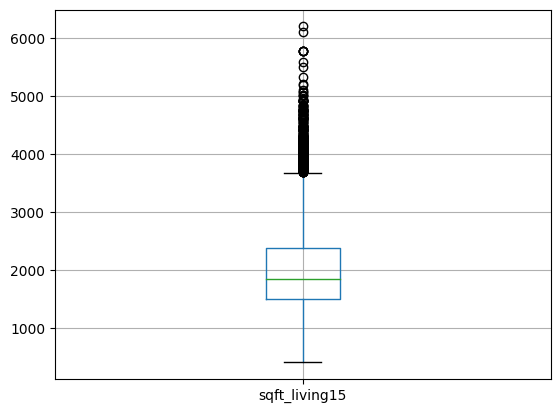

columns =  sqft_lot15


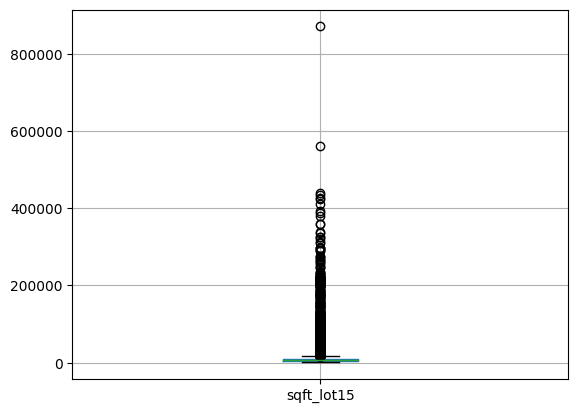

In [154]:
import matplotlib.pyplot as plt
for col in data.columns[(data.nunique()>15) & (data.columns != 'zipcode') &
                      (data.columns != 'date')]:
  print("columns = ", col)
  data.loc[:,[col]].boxplot()
  plt.show()

In [155]:
for col in data.columns[(data.nunique()<=15) ]:
  print("columns = ", col)
  print(data.loc[:,col].value_counts())
  print("################")

columns =  bedrooms
bedrooms
3     7861
4     5478
2     2186
5     1285
6      202
1      149
7       31
8        8
9        5
10       3
11       1
33       1
Name: count, dtype: int64
################
columns =  floors
floors
1.0    8448
2.0    6584
1.5    1530
3.0     508
2.5     134
3.5       6
Name: count, dtype: int64
################
columns =  waterfront
waterfront
0    17071
1      139
Name: count, dtype: int64
################
columns =  condition
condition
3    11195
4     4531
5     1340
2      126
1       18
Name: count, dtype: int64
################
columns =  grade
grade
7     7183
8     4879
9     2060
6     1568
10     895
11     331
5      193
12      69
4       21
13      10
3        1
Name: count, dtype: int64
################


In [156]:
data['date']=pd.to_datetime(data['date'],format='mixed')


In [157]:
data.dtypes


date             datetime64[ns]
price                     int64
bedrooms                  int64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [158]:
data.shape

(17210, 18)

In [159]:
x=data.drop('price',axis=1)
y=data['price']

In [160]:
x.shape,y.shape

((17210, 17), (17210,))

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)


In [162]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13768, 17), (3442, 17), (13768,), (3442,))

In [163]:
cont_cols=['sqft_lot15','sqft_living15','sqft_above','sqft_basement']

In [164]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pt.fit(x_train.loc[:,cont_cols])
#transform for only theses 4 colm

PowerTransformer()

In [165]:
pt.feature_names_in_


array(['sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement'],
      dtype=object)

In [166]:
pt.lambdas_

array([-0.20040303, -0.21304191, -0.24033679, -0.20971686])

In [167]:
x_train_pt=x_train.copy()
x_train_pt.loc[:,cont_cols]=pt.transform(x_train.loc[:,cont_cols])

array([[<Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'sqft_living15'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>]], dtype=object)

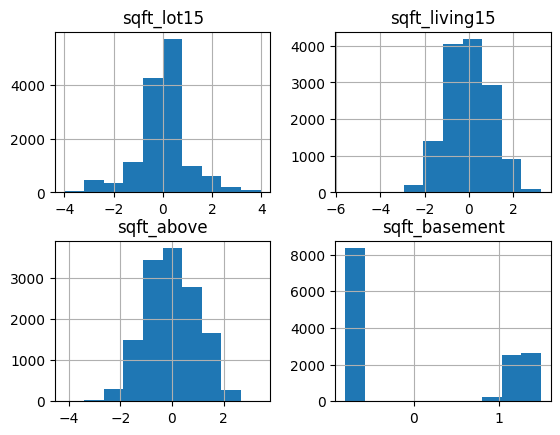

In [168]:
x_train_pt.loc[:,cont_cols].hist()

#power trans to target colm(price)


In [169]:
y_train.describe()

count    1.376800e+04
mean     5.388975e+05
std      3.697166e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

In [170]:
import numpy as np
y_train_pt=np.log(y_train+1)#1 bez it shd not be zero


In [171]:
y_train_pt.describe()

count    13768.000000
mean        13.044164
std          0.528293
min         11.264477
25%         12.676079
50%         13.017005
75%         13.369225
max         15.856731
Name: price, dtype: float64

<Axes: >

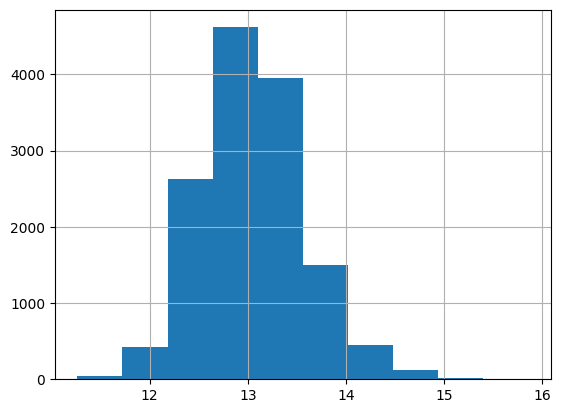

In [172]:
y_train_pt.hist()

<Axes: >

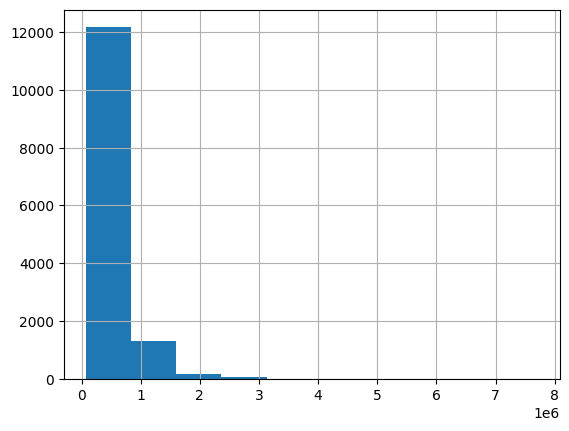

In [173]:
y_train.hist()

FEATURE SELECTION :
FIND TOP 4 FEATURES...


In [174]:
from sklearn.feature_selection import RFE

In [175]:
top_5= ['sqft_living15','sqft_above','grade','condition','bedrooms']

In [176]:
x_train_pt_sel = x_train_pt.loc[:,top_5]

In [177]:
x_train_pt_sel.shape

(13768, 5)

Transform and Feature select test data

In [178]:
x_test_pt = x_test.copy()
x_test_pt.loc[:,cont_cols] = pt.transform(x_test_pt.loc[:,cont_cols])
x_test_pt_sel = x_test_pt.loc[:,top_5]

In [179]:
x_test_pt_sel.shape

(3442, 5)

creating another model

In [180]:
from sklearn.linear_model import Ridge

In [181]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [182]:
# define model
def build_model(n_features=5):
  model1 = Sequential()
  model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
  model1.add(Dense(10, activation='relu'))
  model1.add(Dense(8, activation='relu'))
  # model1.add(Dense(8, activation='relu'))
  model1.add(Dense(1, activation='linear'))
  return model1

In [183]:
model1 = build_model()

In [184]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [185]:
# compile the model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [186]:
# fit the model
history = model1.fit(x_train_pt_sel, y_train, epochs=100,
                     batch_size=32, validation_split=0.3, verbose=0,shuffle=False)

In [190]:
# evaluate the model
loss, score = model1.evaluate(x_test_pt_sel, y_test, verbose=0)
print('Test MAE: %.3f' % score)

Test MAE: 178663.109


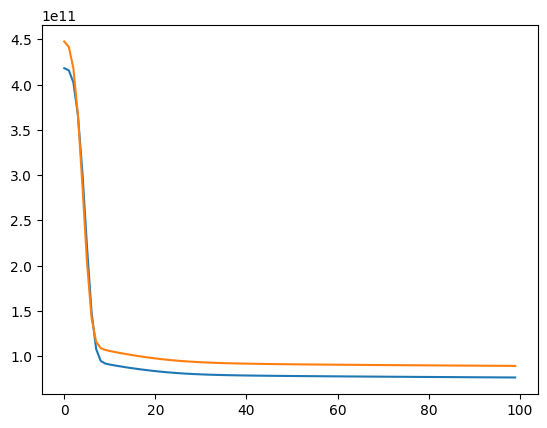

In [191]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [192]:
model2 = build_model()

In [193]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 30        
                                                                 
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [202]:
# fit the model
history = model2.fit(x_train_pt_sel, y_train, epochs=100,
                     batch_size=32, validation_split=0.3, verbose=0,shuffle=False)

In [203]:
# evaluate the model
loss, score = model1.evaluate(x_test_pt_sel, y_test, verbose=0)
print('Test MAE: %.3f' % score)

Test MAE: 172502.797


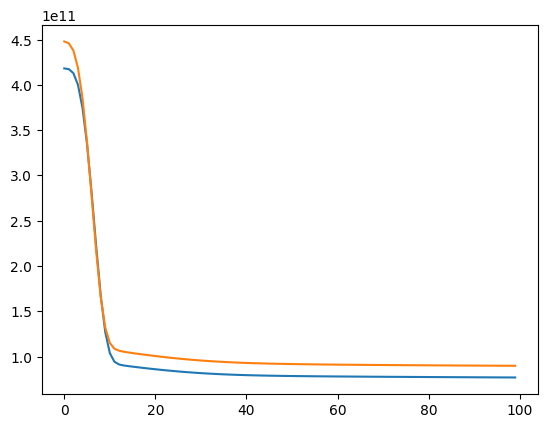

In [204]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [205]:
model2 = build_model()

In [206]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 10)                60        
                                                                 
 dense_14 (Dense)            (None, 8)                 88        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [208]:
# fit the model
history = model2.fit(x_train_pt_sel, y_train_pt, epochs=100,
                     batch_size=32, validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
302/302 - 5s - loss: 70.6853 - mae: 6.6794 - val_loss: 1.1326 - val_mae: 0.8299 - 5s/epoch - 16ms/step
Epoch 2/100
302/302 - 1s - loss: 1.0269 - mae: 0.7694 - val_loss: 0.8790 - val_mae: 0.7323 - 783ms/epoch - 3ms/step
Epoch 3/100
302/302 - 1s - loss: 0.8442 - mae: 0.7046 - val_loss: 0.7578 - val_mae: 0.6822 - 809ms/epoch - 3ms/step
Epoch 4/100
302/302 - 1s - loss: 0.7493 - mae: 0.6685 - val_loss: 0.6897 - val_mae: 0.6527 - 833ms/epoch - 3ms/step
Epoch 5/100
302/302 - 1s - loss: 0.6918 - mae: 0.6452 - val_loss: 0.6423 - val_mae: 0.6313 - 669ms/epoch - 2ms/step
Epoch 6/100
302/302 - 1s - loss: 0.6484 - mae: 0.6262 - val_loss: 0.6029 - val_mae: 0.6122 - 682ms/epoch - 2ms/step
Epoch 7/100
302/302 - 1s - loss: 0.6105 - mae: 0.6079 - val_loss: 0.5667 - val_mae: 0.5936 - 672ms/epoch - 2ms/step
Epoch 8/100
302/302 - 1s - loss: 0.5736 - mae: 0.5891 - val_loss: 0.5283 - val_mae: 0.5728 - 800ms/epoch - 3ms/step
Epoch 9/100
302/302 - 1s - loss: 0.5333 - mae: 0.5676 - val_loss: 0.4859 

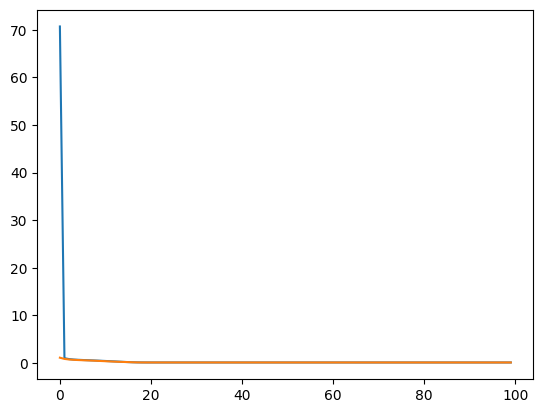

In [209]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Ridge



In [249]:
from sklearn.linear_model import Ridge

In [250]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [251]:
rd1 = Ridge(random_state=7)
rd1.fit(x_train_pt_sel,y_train)
y_pred = rd1.predict(x_test_pt_sel)
mean_squared_error(y_test,y_pred), mean_absolute_error(y_test,y_pred)

(64524779204.28737, 170446.12983181226)

In [252]:
# power transform Y_test
y_test_pt = np.log(y_test)

In [253]:
rd2 = Ridge(random_state=7)
rd2.fit(x_train_pt_sel,y_train_pt)
y_pred_pt = rd2.predict(x_test_pt_sel)
mean_squared_error(y_test_pt,y_pred_pt), mean_absolute_error(y_test_pt,y_pred_pt)

(0.1285302475734743, 0.2867508683927554)

In [254]:
y_test_pt.mean(),y_test_pt.min(),y_test_pt.max(),y_test_pt.std()

(13.046253959205588,
 11.314474526246391,
 15.150511624696614,
 0.5308771876358557)

DEBUG THE MODEL

In [255]:
res=pd.DataFrame([y_test,pd.Series(y_pred)]).T

In [256]:
res.columns = ['Y_test','Y_pred']

In [257]:
res.shape

(6193, 2)

In [258]:
res.describe()

,Y_test,Y_pred
count,3.442000e+03,3.442000e+03
mean,5.399442e+05,5.393570e+05
std,3.581471e+05,2.592435e+05
min,8.200000e+04,-2.970181e+05
25%,3.200000e+05,3.713340e+05
50%,4.520000e+05,5.042776e+05
75%,6.450000e+05,6.676283e+05
max,3.800000e+06,1.735413e+06


In [238]:
#THERE ARE SOME OUTLIERS MAX T_TEST AND Y_PRED HAVE MORE DIFF ION VAL

In [259]:
abs(y_test-y_pred).describe()

count    3.442000e+03
mean     1.704461e+05
std      1.883699e+05
min      1.865517e+01
25%      6.201866e+04
50%      1.267095e+05
75%      2.199023e+05
max      2.243506e+06
Name: price, dtype: float64

In [260]:
err_per_record=np.array(abs(y_test-y_pred))

In [261]:
err_per_record.max()

2243506.4883554964

In [264]:
res['Err'] = abs(res['Y_test']-res['Y_pred'])

In [269]:
err_index=res.sort_values(['Err'],ascending=False).head(10).index

In [270]:
x_test.iloc[err_index,:]

,date,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
154,2014-10-15,3,1510,1245,3.0,0,3,7,1510,0,2007,0,98133,47.7293,-122.343,1510,1245
13474,2014-08-13,3,960,8100,1.0,0,3,7,960,0,1955,0,98155,47.7763,-122.305,1080,8100
2671,2015-04-14,3,1670,4220,2.0,0,3,7,1670,0,2002,0,98038,47.3834,-122.028,1670,4238
6442,2015-04-09,5,4700,22326,2.0,0,3,11,4700,0,2002,0,98006,47.5417,-122.111,4730,27110
16179,2015-03-17,3,1010,15701,1.0,0,4,7,1010,0,1949,0,98188,47.4518,-122.292,1260,9800
4711,2014-08-21,2,1510,7280,2.0,0,3,7,1510,0,1987,0,98074,47.6264,-122.058,1510,8120
13781,2015-01-26,4,2130,9579,1.0,0,4,7,1250,880,1968,0,98001,47.3069,-122.271,1590,9800
13173,2014-07-22,3,1200,8040,1.0,0,4,7,1200,0,1959,0,98146,47.4901,-122.341,1450,9315
14376,2015-04-22,3,1470,9570,1.0,0,3,7,1280,190,1941,0,98125,47.7032,-122.306,1390,9570
10531,2014-08-12,2,670,5140,1.0,0,3,6,670,0,1926,0,98126,47.5387,-122.371,850,5140
